<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений по продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
# первым делом, не думая, подключаем библиотеку для работы с графиками и сам pandas
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', 50) # все столбца показываем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


### Вывод

Итак, начинаем:)
Тут у нас знакомство с данными. Я их открыл и поместил в переменную 'data'. При просмотре заметил, что данные какие то не красивые и указав в качестве разделителя знак табуляции \t, я сделал их более читаемыми. При просмотре первых 10 строк сразу видно, что требуется предобработка(имеется много пропусков, поменял бы пару типов данных на другой).
Начнем предобработку

## Предобработка данных

Начну предобработку со столбца 'last_price', изменю тип на int, а то как то в глаза бьет

In [6]:
data['last_price'] = data['last_price'].astype('int')
data.head()
#Порядок

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0



В столбце 'ceiling_height' есть пропуски. Так как в последующем анализе нужно будет строить гистограмму по этому параметру следует заполнить эти пропуски. Я считаю заполнить их медианой будет хорошо. Потому что в  высота потолков по госту не должна быть ниже 2,5 метра, а также в среднем по стране составляет 2,5-2,7 метра. Очень редко когда высота потолка достигает 3 метра. Поэтому замена медианой вполне нас устраивает.

In [7]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'].isna().sum()
#Порядок

0

В столбеце 'locality_name' невозможно заполнить пропуски, поэтому просто их удаляем

In [8]:
data.dropna(subset=['locality_name'],inplace=True)
data['locality_name'].isna().sum()
#Порядок

0

In [9]:
data['floors_total']=data.fillna(data['floors_total'].mean())#Заполняю средним значением пропуски в 'floors_total'
data['floors_total'].isnull().sum()

0

In [10]:
data['is_apartment'].isnull().sum()
data['is_apartment'].unique()
data['is_apartment'] = data['is_apartment'].fillna(False)# если пропуск, то это не апортаменты
data['is_apartment'].unique()
data['is_apartment'].isnull().sum()

0

In [11]:
data['balcony'].isnull().sum()
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')
data['balcony'].unique()

array([0, 2, 1, 5, 4, 3])

In [12]:
#Думаю еще можно некоторые столбцы заменить на bool
data['studio'] = data['studio'].astype('bool')
data['open_plan'] = data['open_plan'].astype('bool')


Заполняю пропуски в столбце 'living_area' для этого найду долю жилой площади в среднем по квартирам и затем посчитаю для каждого пропуска жилая_площадь = доля_жилой_площади * (общая_площадь - площадь_кухни)

In [13]:
data['living_area'].isnull().sum()
live = data['living_area'].mean()
kitchen = data['kitchen_area'].mean()
total = data['total_area'].mean()
dolya_live = live / (total - kitchen)#доля жилой площади
dolya_live
data['propusk'] = data['living_area'].isnull()
for index, row in data.iterrows():
    if row['propusk'] == True:
        data['living_area'] = data['living_area'].fillna((row['total_area'] - row['kitchen_area']) * dolya_live)
        
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,propusk
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,20,51.000000,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,False
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.65,7,18.600000,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,False
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.65,10,34.300000,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,False
3,0,64900000,159.0,2015-07-24T00:00:00,3,2.65,0,36.481734,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,True
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,2,32.000000,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,False


Для пропусков в столбце 'kitchen_area', использую тот же принцип что и со столбцом 'living_area'.

In [14]:
data['kitchen_area'].isnull().sum()
live = data['living_area'].mean()
kitchen = data['kitchen_area'].mean()
total = data['total_area'].mean()
dolya_kitchen = kitchen / (total - live)#доля площади кухни
dolya_kitchen
data['propusk'] = data['kitchen_area'].isnull()
for index, row in data.iterrows():
    if row['propusk'] == True:
        data['kitchen_area'] = data['kitchen_area'].fillna((row['total_area'] - row['living_area']) * dolya_kitchen)
        
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,propusk
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,20,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,False
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.65,7,18.600000,1,False,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,False
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.65,10,34.300000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,False
3,0,64900000,159.0,2015-07-24T00:00:00,3,2.65,0,36.481734,9,False,False,False,50.338329,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,True
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,2,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,False


In [15]:
#Приведем столбцы 'living_area' и 'kitchen_area' в нормальный вид

data['kitchen_area'] = round(data['kitchen_area'], 1)
data['living_area'] = round(data['living_area'], 1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,propusk
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,20,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,False
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.65,7,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,False
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.65,10,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,False
3,0,64900000,159.0,2015-07-24T00:00:00,3,2.65,0,36.5,9,False,False,False,50.3,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,True
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,2,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,False


In [16]:
data['cityCenters_nearest'].fillna(data.groupby('locality_name')['cityCenters_nearest'].transform('mean'),inplace=True)
#заполняем пропуски расстояния до центра по среднемму значению расстояния в зависимости от района.
data['cityCenters_nearest']=data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].mean())
data['cityCenters_nearest'].isna().sum()

0

In [17]:
grouped_airpots_nearest=data.groupby('locality_name')['airports_nearest'].transform('mean') 
data['airports_nearest'].isnull().sum()

5534

In [18]:
#заполняем пропуски расстояния до аэропорта по среднемму значению расстояния в зависимости от района.
data['airports_nearest'].fillna(grouped_airpots_nearest,inplace=True)
data['airports_nearest'].isnull().sum()

5386

In [19]:
#где остались пропуски расстояния до аэропорта  заполняем просто по среднемму значению расстояния
data['airports_nearest']=data['airports_nearest'].fillna(data['airports_nearest'].mean()) 
data['airports_nearest'].isnull().sum()

0

Столбцы:'parks_around3000', 'parks_nearest', 'ponds_nearest', 'ponds_around3000' заполняем средним

In [20]:
data['parks_around3000']=data['parks_around3000'].fillna(data['parks_around3000'].mean())
data['parks_nearest']=data['parks_nearest'].fillna(data['parks_nearest'].mean())
data['ponds_nearest']=data['ponds_nearest'].fillna(data['ponds_nearest'].mean())
data['ponds_around3000']=data['ponds_around3000'].fillna(data['ponds_around3000'].mean())
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

In [22]:
# удаление вспомогательного столбца
data.pop('propusk')

0        False
1        False
2        False
3         True
4        False
         ...  
23694    False
23695    False
23696     True
23697    False
23698    False
Name: propusk, Length: 23650, dtype: bool

Снова получаем информацию о данныз с помощью функции info()

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null int64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null object
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null int64
locality_name           23650 non-null object
airports_nearest        23650 non-null float64
cityCenters_nearest     23650 non-null float64
parks_around3000        23650 non-null int64
parks_nearest           23650 non-null float64
ponds_around3000      

In [24]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,20,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.000000,2,755.000000,NaN
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.65,7,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,490.830729,0,518.059879,81.0
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.65,10,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.000000,2,574.000000,558.0
3,0,64900000,159.0,2015-07-24T00:00:00,3,2.65,0,36.5,9,False,False,False,50.3,0,Санкт-Петербург,28098.0,6800.0,2,84.000000,3,234.000000,424.0
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,2,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.000000,1,48.000000,121.0


Общий вывод:
Пропуски заполнены. В таблице осталось 23650 строк из 23699. Всего удалили 49 строк и один столбец, который не учавствует в анализе. Типы данных переведины в верные.

## Расчёты и добавление результатов в таблицу

Теперь расчеты
Начнем!
Сперва, посчитаем цену квадратного метра

In [25]:
data['price_for_m2']=data['last_price']/data['living_area']# Посчитали и сделали столбец со стоимостью за м2
data['price_for_m2'] = round(data['price_for_m2'], 3)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,20,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.000000,2,755.000000,NaN,254901.961
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.65,7,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,490.830729,0,518.059879,81.0,180107.527
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.65,10,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.000000,2,574.000000,558.0,151486.880
3,0,64900000,159.0,2015-07-24T00:00:00,3,2.65,0,36.5,9,False,False,False,50.3,0,Санкт-Петербург,28098.0,6800.0,2,84.000000,3,234.000000,424.0,1778082.192
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,2,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.000000,1,48.000000,121.0,312500.000


In [26]:
#Теперь поработаем с датой
#Переведу дату в тип datetime и создам новые столбцы с днем недели, месяцем и годом

data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'],format='%Y.%m.%dT%H:%M:%S')

data['week_day']=data['first_day_exposition'].dt.weekday # создаю столбец с днем недели
data['month']=data['first_day_exposition'].dt.month # с месяцем
data['year']=data['first_day_exposition'].dt.year # с годом
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,week_day,month,year
0,20,13000000,108.0,2019-03-07,3,2.70,20,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.000000,2,755.000000,NaN,254901.961,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.65,7,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,490.830729,0,518.059879,81.0,180107.527,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.65,10,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.000000,2,574.000000,558.0,151486.880,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.65,0,36.5,9,False,False,False,50.3,0,Санкт-Петербург,28098.0,6800.0,2,84.000000,3,234.000000,424.0,1778082.192,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,2,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.000000,1,48.000000,121.0,312500.000,1,6,2018


In [27]:
#разберемся с этажами
# Функция категоризации этажей
def floor_group(row):
    what_floor=row['floor']
    total_floor=row['floors_total']
    if what_floor==1:
        return 'Первый этаж'
    if what_floor==total_floor:
        return 'Последний этаж'
    return 'Другой этаж'

floor_position=data.apply(floor_group,axis=1) #заливка датафрейма через apply и функцию
data['Floor_position']=floor_position 

In [28]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,week_day,month,year,Floor_position
0,20,13000000,108.0,2019-03-07,3,2.70,20,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.000000,2,755.000000,NaN,254901.961,3,3,2019,Другой этаж
1,7,3350000,40.4,2018-12-04,1,2.65,7,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,490.830729,0,518.059879,81.0,180107.527,1,12,2018,Первый этаж
2,10,5196000,56.0,2015-08-20,2,2.65,10,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.000000,2,574.000000,558.0,151486.880,3,8,2015,Другой этаж
3,0,64900000,159.0,2015-07-24,3,2.65,0,36.5,9,False,False,False,50.3,0,Санкт-Петербург,28098.0,6800.0,2,84.000000,3,234.000000,424.0,1778082.192,4,7,2015,Другой этаж
4,2,10000000,100.0,2018-06-19,2,3.03,2,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.000000,1,48.000000,121.0,312500.000,1,6,2018,Другой этаж


In [29]:
data['living_area/total_area']=data['living_area']/data['total_area'] #  отношение  жилой к общей площади
data['kitchen_area/total_area']=data['kitchen_area']/data['total_area'] #отношение площади кухни к жилой площади
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,week_day,month,year,Floor_position,living_area/total_area,kitchen_area/total_area
0,20,13000000,108.0,2019-03-07,3,2.70,20,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.000000,2,755.000000,NaN,254901.961,3,3,2019,Другой этаж,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.65,7,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,490.830729,0,518.059879,81.0,180107.527,1,12,2018,Первый этаж,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.65,10,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.000000,2,574.000000,558.0,151486.880,3,8,2015,Другой этаж,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.65,0,36.5,9,False,False,False,50.3,0,Санкт-Петербург,28098.0,6800.0,2,84.000000,3,234.000000,424.0,1778082.192,4,7,2015,Другой этаж,0.229560,0.316352
4,2,10000000,100.0,2018-06-19,2,3.03,2,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.000000,1,48.000000,121.0,312500.000,1,6,2018,Другой этаж,0.320000,0.410000


Вывод:
Отлично теперь, когда созданы дополнительные столбцы с данными, можно переходить к исследованию

## Исследовательский анализ данных

Text(0, 0.5, 'flats')

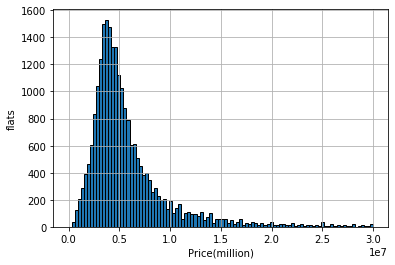

In [30]:
# дальше строим гистограму по цене с 100 корзинами и до 30 миллионов
data['last_price'].hist(bins = 100, range = (0, 30000000), edgecolor="black")
plt.xlabel('Price(million)')
plt.ylabel('flats')

Из данной гистограмы видно, что большенство квартир стоят от 3 до 5 миллионов.

Text(0, 0.5, 'flats')

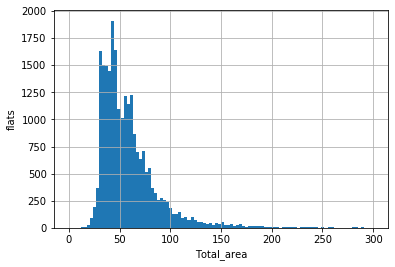

In [31]:
#Построим гистограму по площади, но перед этим посмотрим, какая максимальная площадь для выбора параметра range
# Самая большая площадь стоставляет 900, построив её я понял что это ничего не дает(график не понятен) и сократил до 300
data['total_area'].hist(bins = 100, range = (0, 300))
plt.xlabel('Total_area')
plt.ylabel('flats')

Отсюда видно, что больше всего квартир площадью от 35 до 50 метров. 

Text(0, 0.5, 'flats')

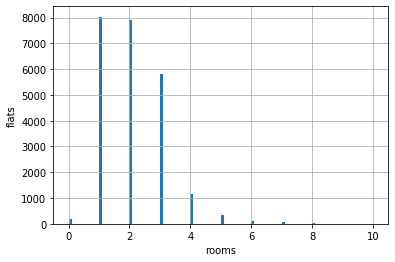

In [32]:
#Строим гистограму по комнатам
data['rooms'].hist(bins = 100, range = (0, 10))
plt.xlabel('rooms')
plt.ylabel('flats')

Хах, 0 комнат, похоже выброс от которого мы дальше избавимся, а так в порядке вещей квартиры с одной, двумя или тремя комнатами.

Text(0, 0.5, 'flats')

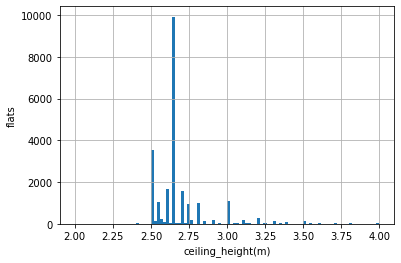

In [33]:
data['ceiling_height'].hist(bins = 100, range = (2, 4))
plt.xlabel('ceiling_height(m)')
plt.ylabel('flats')

Потолки от 2,5 до 3 метров 

1580.0


Text(0, 0.5, 'flats')

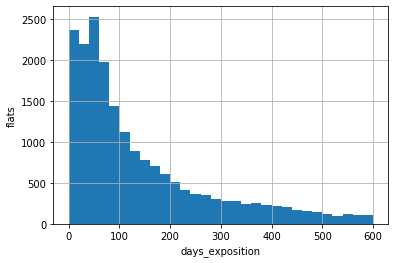

In [34]:
# теперь нужно изучить время продажи квартиры
# построим гистограму по дням продажи
print(data['days_exposition'].max())
data['days_exposition'].hist(bins=30,range=(0,600))
plt.xlabel('days_exposition')
plt.ylabel('flats')

In [35]:
#Больше всего квартир продаются за 100 дней
#Исследуем данные методом describe()
data['days_exposition'].describe()


count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

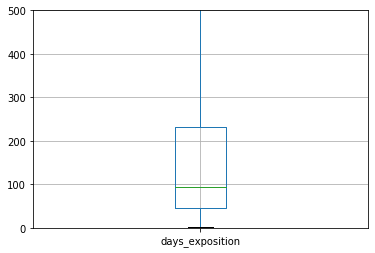

In [36]:
#Построим коробочный график
plt.ylim(0,500)
data.boxplot(column='days_exposition') 
plt.show()

Исследуя гистограмму и коробок можно видеть, что среднее время продажи квартиры 90 - 100 дней. Большая часть значений лежит за диапазоном 425 дней (1.5 межквартального размаха, добавленного к третьему квартилю). Это выглядит правдоподобным. Нус, самой быстрой продажой я назову один день, а самой долгой продажей (если не брать во внимание выбросы, которые лежат за 1.5 межквартального размаха, добавленного в третьей квартилии)-425 дней.

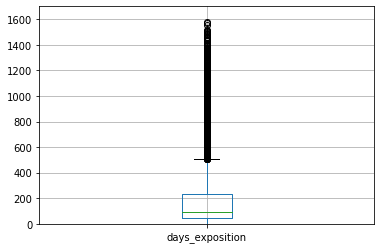

In [37]:
#Выведу выброс(данные, котороые больше 425)
plt.ylim(0,1700)
data.boxplot(column='days_exposition')
plt.show()

In [38]:
#Сортируем данные для последующего среза
data.sort_values(by='days_exposition',ascending=False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,week_day,month,year,Floor_position,living_area/total_area,kitchen_area/total_area
18843,11,3500000,48.20,2014-12-15,2,2.50,11,27.4,2,False,False,False,7.7,3,деревня Новое Девяткино,28879.458401,14236.244511,0,490.830729,0,518.059879,1580.0,127737.226,0,12,2014,Другой этаж,0.568465,0.159751
1109,1,34878556,95.80,2014-12-09,2,2.65,1,58.3,5,True,False,False,20.0,1,Санкт-Петербург,21860.000000,318.000000,2,160.000000,3,569.000000,1572.0,598259.966,1,12,2014,Другой этаж,0.608559,0.208768
9553,11,10600000,80.00,2014-12-09,3,2.85,11,44.0,9,False,False,False,15.0,0,Санкт-Петербург,17101.000000,17110.000000,0,490.830729,0,518.059879,1553.0,240909.091,1,12,2014,Другой этаж,0.550000,0.187500
1885,2,13300000,79.60,2014-12-09,2,3.00,2,42.7,7,False,False,False,18.0,0,Санкт-Петербург,39393.000000,11096.000000,1,537.000000,0,518.059879,1513.0,311475.410,1,12,2014,Другой этаж,0.536432,0.226131
6691,3,4400000,42.98,2014-12-12,1,2.65,3,18.7,1,False,False,False,11.3,0,Пушкин,19715.000000,30358.000000,1,439.000000,3,232.000000,1512.0,235294.118,4,12,2014,Первый этаж,0.435086,0.262913


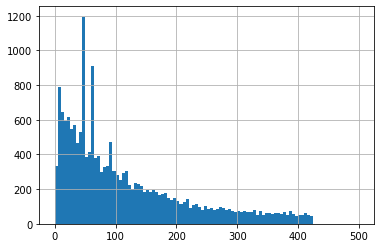

In [39]:
current_days_exposition_date=data.query('days_exposition<425')
current_days_exposition_date['days_exposition'].hist(bins=100,range=(0,500))

Убрал выбросы находящиеся за 1.5 межквартальным интервалом. Всего наблюдается 4 пика. Самый большой пик- 95 дней, есть еще пики 50 дней, 70 дней и 10 дней. Не могу сказать, что это артефакты, т.к. реально это возможно. Большая часть выбросов лежит за диапазоном 420 дней и они стремяться к 0. Принял решение от них избавиться. Настало время разобраться с ценой.

In [40]:
current_days_exposition_date['last_price'].describe()

count    1.809700e+04
mean     6.033974e+06
std      1.072481e+07
min      1.219000e+04
25%      3.380000e+06
50%      4.500000e+06
75%      6.300000e+06
max      7.630000e+08
Name: last_price, dtype: float64

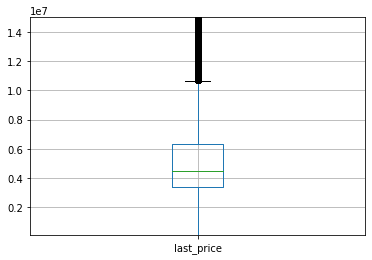

In [41]:
plt.ylim(100000,15000000)
current_days_exposition_date.boxplot(column='last_price')
plt.show()

На диаграмме размаха видно, что в выбросы попадают квартиры дороже 11 млн. руб

In [42]:
current_days_exposition_date.sort_values(by='last_price',ascending=True).head(10)
#Тут я отсортировал в порядке возрастания цены

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,week_day,month,year,Floor_position,living_area/total_area,kitchen_area/total_area
8793,7,12190,109.0,2019-03-20,2,2.75,7,32.0,25,False,False,False,40.5,0,Санкт-Петербург,36421.000000,9176.000000,1,805.000000,0,518.059879,8.0,380.938,2,3,2019,Другой этаж,0.293578,0.371560
14911,5,430000,54.0,2018-06-26,2,2.65,5,36.5,3,False,False,False,50.3,0,посёлок станции Свирь,28879.458401,14236.244511,0,490.830729,0,518.059879,44.0,11780.822,1,6,2018,Другой этаж,0.675926,0.931481
16274,18,440000,40.0,2018-07-10,1,2.65,18,36.5,1,False,False,False,50.3,0,деревня Старополье,28879.458401,14236.244511,0,490.830729,0,518.059879,45.0,12054.795,1,7,2018,Первый этаж,0.912500,1.257500
17676,0,450000,36.5,2018-02-01,1,2.65,0,17.3,4,False,False,False,8.5,1,деревня Ям-Тесово,28879.458401,14236.244511,0,490.830729,0,518.059879,120.0,26011.561,3,2,2018,Другой этаж,0.473973,0.232877
9581,7,450000,43.4,2018-08-31,2,2.65,7,30.3,3,False,False,False,5.5,0,деревня Старополье,28879.458401,14236.244511,0,490.830729,0,518.059879,96.0,14851.485,4,8,2018,Другой этаж,0.698157,0.126728
16219,14,450000,38.5,2018-07-11,2,2.65,14,36.5,1,False,False,False,50.3,0,деревня Вахнова Кара,28879.458401,14236.244511,0,490.830729,0,518.059879,45.0,12328.767,2,7,2018,Первый этаж,0.948052,1.306494
5698,7,450000,42.0,2017-07-31,2,2.65,7,23.0,1,False,False,False,5.8,0,городской посёлок Будогощь,28879.458401,14236.244511,0,490.830729,0,518.059879,233.0,19565.217,0,7,2017,Первый этаж,0.547619,0.138095
23484,11,470000,44.5,2018-07-02,2,2.65,11,28.0,2,False,False,False,7.5,0,Сланцы,28879.458401,14236.244511,0,490.830729,0,518.059879,298.0,16785.714,0,7,2018,Другой этаж,0.629213,0.168539
18867,1,470000,41.0,2018-02-11,1,2.65,1,32.0,3,False,False,False,9.0,0,деревня Выскатка,28879.458401,14236.244511,0,490.830729,0,518.059879,46.0,14687.500,6,2,2018,Другой этаж,0.780488,0.219512
21912,0,470000,37.0,2018-02-18,1,2.65,0,36.5,3,False,False,False,50.3,0,поселок Совхозный,28879.458401,14236.244511,0,490.830729,0,518.059879,45.0,12876.712,6,2,2018,Другой этаж,0.986486,1.359459


Смотрю самую дорогую квартиру. Данные правдивые. Такие квартиры существуют. Так как их единицы, то думаю, что можно убрать значения начиная с 1.5 межквартального интервала+Q3= 11*10^6, правее все стремится к нулю. Также кажутся неправильными значения меньшие 1500000 за квартиру. Нереально чтобы квартира столько стоила. Поэтому убираем

In [43]:
current_days_exposition_date=current_days_exposition_date.query('1500000<last_price<11*10**6')#Избавляемся от выбросов

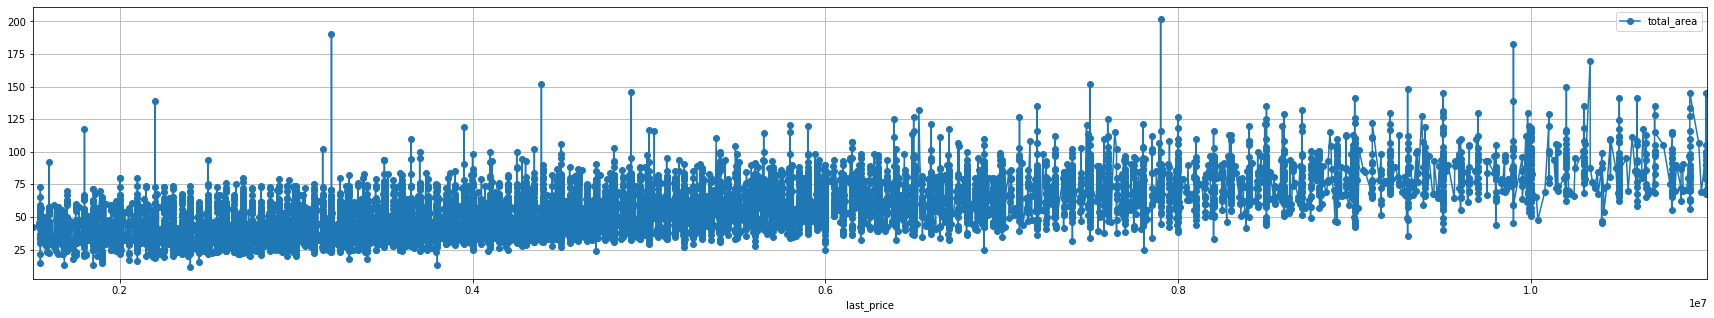

In [44]:
(current_days_exposition_date.sort_values(by='last_price',ascending=True).plot(x='last_price',y='total_area',grid=True, style='o-',figsize=(30,5)))

In [45]:
current_days_exposition_date['last_price'].corr(current_days_exposition_date['total_area'])#Считаю кореляцию

0.6983773639664946

При увеличении площади, в принципе естественно, что увеличивается стоимость квартиры. Стоимость квартиры коррелирует с площадью на коэффицент Пирсона 0.687. Значит сильно зависят эти величины друг от друга. Положительная корреляция получается

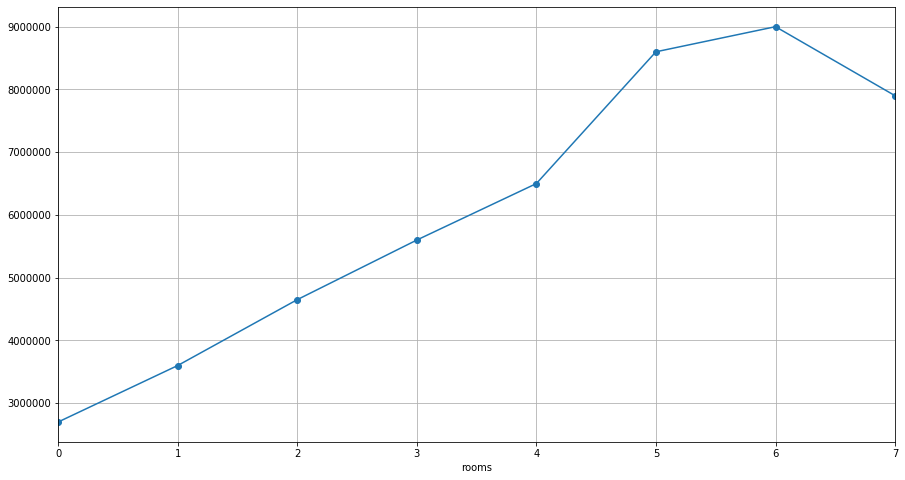

In [46]:
(current_days_exposition_date
     .groupby('rooms')['last_price'].median()
    # .sort_values(by='rooms',ascending=True)
     .plot(x='rooms',y='last_price',style='o-',grid=True,figsize=(15,8),alpha=1)
)

In [47]:
data['rooms'].value_counts()#Проверка

1     8036
2     7924
3     5797
4     1175
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

На этом графике видно, что при увеливении кол-ва комнат, увеличивается стоимость. С кол-вом комнат 7, она ниже, так- как мало данных и значение медианной цены вносит свою корректировку(Это мы выяснили в проверке)

In [48]:
current_days_exposition_date['last_price'].corr(current_days_exposition_date["rooms"])

0.46070167604290424

Стоимость квартиры коррелирует с количеством комнат на коэффицент Пирсона 0.45

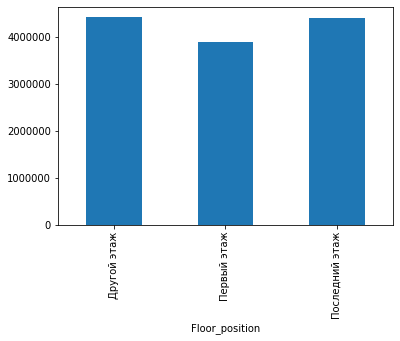

In [49]:
(current_days_exposition_date
    .groupby('Floor_position')['last_price'].median()
    .plot(x='Floor_position',y='last_price',kind='bar')
)

In [50]:
current_days_exposition_date['floor'].corr(current_days_exposition_date['last_price'])

0.10969832612663795

Из гистограммы видно, что цена не сильно зависит от этажа. Видно, что цена за первый этаж немного ниже. Эти выводы подтверждает коэф Пирсона= 0.11

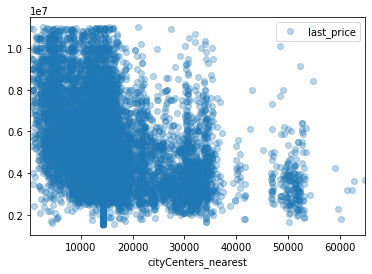

In [51]:
(current_days_exposition_date
     .sort_values(by='cityCenters_nearest',ascending=True)
     .plot(x='cityCenters_nearest',y='last_price',style='o',alpha=0.3)
)

In [52]:
current_days_exposition_date['cityCenters_nearest'].corr(current_days_exposition_date['last_price'])

-0.26714771437736173

С увеличением расстояния до центра цена уменьшается, но не сильно. Разброс большой.

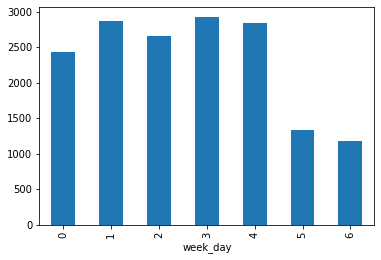

In [53]:
(current_days_exposition_date
     #.pivot_table(index='week_day',values='last_price',aggfunc=('median'))
     .groupby('week_day')['last_price'].count()
     .plot(x='week_day',y='last_price',kind='bar')
)

На гистаграме все сразу видно, чаще всего квартиры покупаются во вторник, четверг и пятицу, а в выходные меньше.

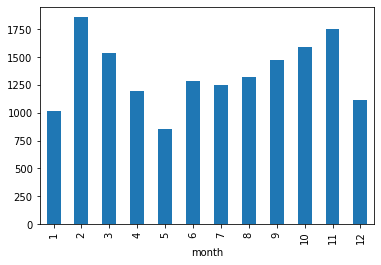

In [54]:
(current_days_exposition_date
     #.pivot_table(index='week_day',values='last_price',aggfunc=('median'))
     .groupby('month')['last_price'].count()
     .plot(x='month',y='last_price',kind='bar')
)

Тоже все просто и понятно. Объявления меньше всего закрываются в месяцы перед НГ в декабре и после НГ в январе. Много выходных и люди тратят деньги на подарки и отдых. В мае низко тоже из-зи праздников скорее всего.

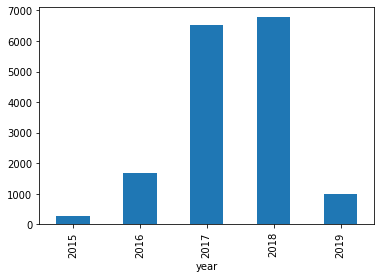

In [55]:
(current_days_exposition_date
     #.pivot_table(index='week_day',values='last_price',aggfunc=('median'))
     .groupby('year')['last_price'].count()
     .plot(x='year',y='last_price',kind='bar')
)

Больше всего продаж в 2017 и 2018 году.

Теперь выберем 10 населённых пунктов с наибольшим числом объявлений.

In [56]:
#raiting_of_location=current_days_exposition_date.groupby('locality_name')['price_for_m2'].count()
raiting_of_location=current_days_exposition_date.pivot_table(index='locality_name',values='price_for_m2',aggfunc=('count','median'))
raiting_of_location.sort_values(by='count',ascending=False).head(10)

,count,median
locality_name,,
Санкт-Петербург,10690,178571.4290
посёлок Мурино,475,165680.4730
посёлок Шушары,372,141666.6670
Всеволожск,293,123123.1230
Колпино,284,123371.8490
посёлок Парголово,274,189041.0960
деревня Кудрово,262,179264.0690
Пушкин,254,172332.5835
Гатчина,229,114285.7140


В Санкт-Петербурге больше всего объявлений и самая большая стоимость 1м.кв.

В Выборге меньше всего объявлений и самая низкая стоимость 1м.кв.

In [57]:
#Добавил в сводную таблицу расстояние до центра
current_days_exposition_date['cityCenters_nearest_in_km'] = current_days_exposition_date['cityCenters_nearest'] / 1000
current_days_exposition_date['cityCenters_nearest_in_km'] = round(current_days_exposition_date['cityCenters_nearest_in_km'], 2)

In [58]:
current_days_exposition_date['cost_of_km'] = current_days_exposition_date['last_price'] / current_days_exposition_date['cityCenters_nearest_in_km']
current_days_exposition_date['cost_of_km'] = round(current_days_exposition_date['cost_of_km'], 3)

In [59]:
spb_region=current_days_exposition_date.query('locality_name=="Санкт-Петербург"')
spb_region.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,week_day,month,year,Floor_position,living_area/total_area,kitchen_area/total_area,cityCenters_nearest_in_km,cost_of_km
4,2,10000000,100.0,2018-06-19,2,3.03,2,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.000000,1,48.000000,121.0,312500.000,1,6,2018,Другой этаж,0.320000,0.410000,8.10,1234567.901
9,18,5400000,61.0,2017-02-26,3,2.50,18,43.6,7,False,False,False,6.5,2,Санкт-Петербург,50898.0,15008.0,0,490.830729,0,518.059879,289.0,123853.211,6,2,2017,Другой этаж,0.714754,0.106557,15.01,359760.160
10,5,5050000,39.6,2017-11-16,1,2.67,5,20.3,3,False,False,False,8.5,0,Санкт-Петербург,38357.0,13878.0,1,310.000000,2,553.000000,137.0,248768.473,3,11,2017,Другой этаж,0.512626,0.214646,13.88,363832.853
15,16,4650000,39.0,2017-11-18,1,2.65,16,20.5,5,False,False,False,7.6,1,Санкт-Петербург,12900.0,14259.0,1,590.000000,1,296.000000,19.0,226829.268,5,11,2017,Другой этаж,0.525641,0.194872,14.26,326086.957
16,11,6700000,82.0,2017-11-23,3,3.05,11,55.6,1,False,False,False,9.0,0,Санкт-Петербург,22108.0,10698.0,3,420.000000,0,518.059879,397.0,120503.597,3,11,2017,Первый этаж,0.678049,0.109756,10.70,626168.224


Посчитал стоимость 1 кв м для всех объектом и записал в таблицу и сделал срез по региону Санкт-Петербург.

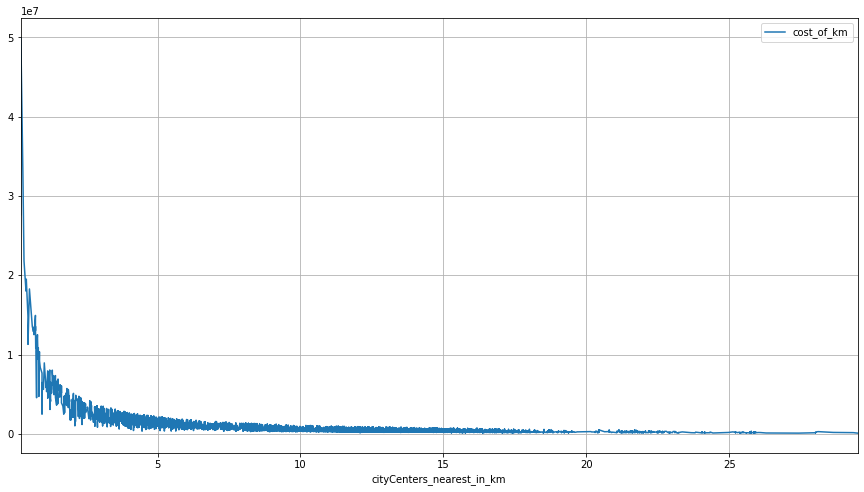

In [60]:
#График зависимости цены 1 м кв от расстояния в регионе Спб
(spb_region
     .sort_values(by='cityCenters_nearest_in_km',ascending=True)
     .plot(x='cityCenters_nearest_in_km',y='cost_of_km', style='-',figsize=(15,8), grid = True)
)

Итак, по этому графику видно, что после расстояния до цента 5 км цена за квадратный метр почти не меняется, находится на одном уровне

In [61]:
spb_region = spb_region.query('cityCenters_nearest_in_km < 5')

In [62]:
# Квартиры в центре Питера
len(spb_region)

862

In [63]:
# Выведем самые высокие цены в центре Питера
spb_region.sort_values(by = 'cost_of_km',ascending = False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,week_day,month,year,Floor_position,living_area/total_area,kitchen_area/total_area,cityCenters_nearest_in_km,cost_of_km
8614,7,10990000,100.0,2015-12-16,3,3.90,7,37.8,3,False,False,False,11.6,0,Санкт-Петербург,21818.0,215.0,3,229.0,2,511.0,265.0,290740.741,2,12,2015,Другой этаж,0.378000,0.116000,0.22,4.995455e+07
1934,18,9590000,108.0,2017-05-23,2,3.30,18,59.0,2,False,False,False,11.0,0,Санкт-Петербург,21908.0,287.0,3,359.0,3,290.0,69.0,162542.373,1,5,2017,Другой этаж,0.546296,0.101852,0.29,3.306897e+07
1182,1,5800000,33.6,2016-03-10,1,3.70,1,22.8,4,False,False,False,6.6,0,Санкт-Петербург,21632.0,208.0,3,304.0,3,503.0,167.0,254385.965,3,3,2016,Другой этаж,0.678571,0.196429,0.21,2.761905e+07
22036,3,7200000,72.0,2017-12-21,2,3.07,3,44.9,2,False,False,False,12.3,0,Санкт-Петербург,21875.0,329.0,3,426.0,3,273.0,89.0,160356.347,3,12,2017,Другой этаж,0.623611,0.170833,0.33,2.181818e+07
9488,3,8000000,106.0,2018-07-26,3,3.40,3,36.5,1,False,False,False,50.3,0,Санкт-Петербург,21653.0,410.0,3,591.0,2,38.0,60.0,219178.082,3,7,2018,Первый этаж,0.344340,0.474528,0.41,1.951220e+07


In [64]:
top=current_days_exposition_date.query('cityCenters_nearest_in_km<5 and locality_name=="Санкт-Петербург"')
top.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,week_day,month,year,Floor_position,living_area/total_area,kitchen_area/total_area,cityCenters_nearest_in_km,cost_of_km
24,8,6500000,97.2,2015-10-31,2,2.65,8,46.5,1,False,False,False,19.6,0,Санкт-Петербург,20052.0,2336.0,3,411.000000,3,124.000000,265.0,139784.946,5,10,2015,Первый этаж,0.478395,0.201646,2.34,2777777.778
99,32,9600000,90.0,2017-09-26,4,2.65,32,67.0,2,False,False,False,8.0,0,Санкт-Петербург,23277.0,2818.0,0,490.830729,0,518.059879,104.0,143283.582,1,9,2017,Другой этаж,0.744444,0.088889,2.82,3404255.319
136,16,6500000,51.8,2018-08-01,2,3.45,16,25.6,2,False,False,False,7.3,1,Санкт-Петербург,20502.0,3618.0,2,533.000000,1,812.000000,163.0,253906.250,2,8,2018,Другой этаж,0.494208,0.140927,3.62,1795580.110
138,8,4800000,40.0,2017-11-18,2,2.65,8,29.0,2,False,False,False,6.0,0,Санкт-Петербург,23371.0,2913.0,0,490.830729,2,729.000000,80.0,165517.241,5,11,2017,Другой этаж,0.725000,0.150000,2.91,1649484.536
154,1,8200000,80.0,2018-11-06,3,4.15,1,44.2,2,False,False,False,12.2,0,Санкт-Петербург,20562.0,3167.0,2,344.000000,1,838.000000,38.0,185520.362,1,11,2018,Другой этаж,0.552500,0.152500,3.17,2586750.789


Приступаем к изучению квартир в центре

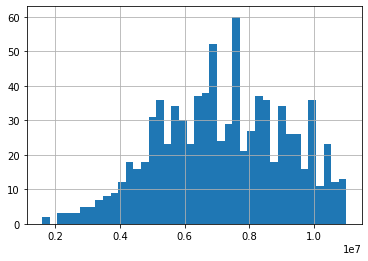

In [65]:
top['last_price'].hist(bins=40)

В центральном районе больше всего квартир в диапозоне от 6,5 до 8 миллионов

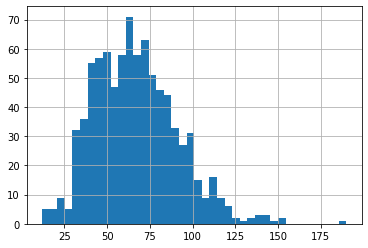

In [66]:
top['total_area'].hist(bins=40)

А по площади можно сказать вот что: больше всего квартир площадью от 50 до 75 квадратов

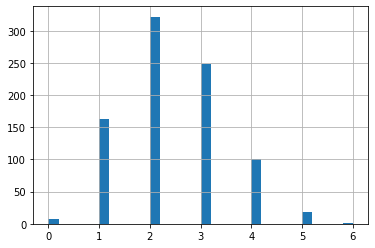

In [67]:
top['rooms'].hist(bins=30)

В центральном районе преимущественно квартиры с двумя - тремя комнатами

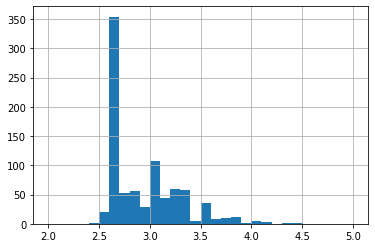

In [68]:
top['ceiling_height'].hist(bins=30, range=(2, 5))

Высота потолков 2,6 метра в полне нормальное дело для Питера

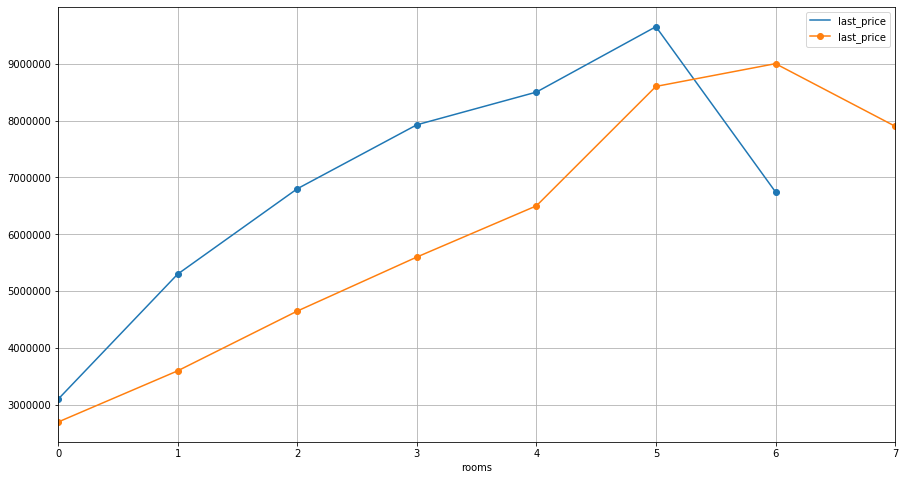

In [69]:
(top # Квартиры в центре
     .sort_values(by='last_price',ascending=True)
     .groupby('rooms')['last_price'].median()
     .plot(x='rooms',y='last_price',style='o-',grid=True,figsize=(15,8),legend=True)
)


(current_days_exposition_date # Все квартиры
     .groupby('rooms')['last_price'].median()
     .plot(x='rooms',y='last_price',style='o-',grid=True,figsize=(15,8),legend=True)
)
plt.show()

На графике видно, что с увеличением комнат увеличивается стоимость, что очень даже логично. График квартир в центре сдвинут вверх отностительно всех квартир, т.к. в центре квартиры дороже. Самые дорогие 5 комнатные квартиры

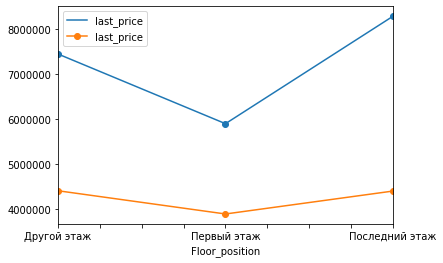

In [70]:
(top #Центр
    .groupby('Floor_position')['last_price'].median()
    .plot(x='Floor_position',y='last_price',style='o-',legend=True)
)


(current_days_exposition_date # Все квартиры
    .groupby('Floor_position')['last_price'].median()
    .plot(x='Floor_position',y='last_price',style='o-',legend=True)
)

plt.show()

Подчеркиваем социальный статус, квартиры на последнем этаже в центре самые дорогие. На первом этаже покупают реже всего. В центральном районе они намного дороже

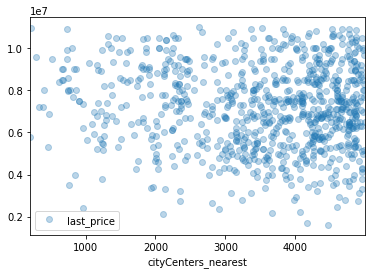

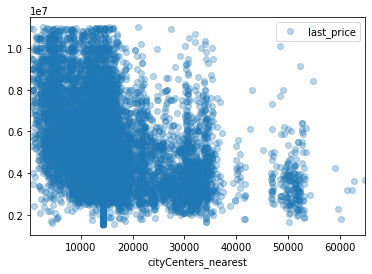

In [71]:
(top
     .sort_values(by='cityCenters_nearest',ascending=True)
     .plot(x='cityCenters_nearest',y='last_price',style='o',alpha=0.3)
)

(current_days_exposition_date
     .sort_values(by='cityCenters_nearest',ascending=True)
     .plot(x='cityCenters_nearest',y='last_price',style='o',alpha=0.3)
)

plt.show()

На верхнем графике видно, что больше всего квартир на расстоянии 4-5км и стоят они от 3-11 млн. руб

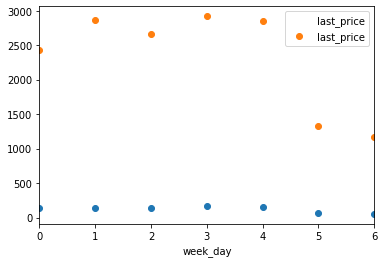

In [72]:
(top
     .groupby('week_day')['last_price'].count()
     .plot(x='week_day',y='last_price',style='o',legend=True)
)

(current_days_exposition_date
     .groupby('week_day')['last_price'].count()
     .plot(x='week_day',y='last_price',style='o',legend=True)
)

plt.show()

В течении недели квартиры продаются примерно одинаково. в субб и в воскр сильно меньше.

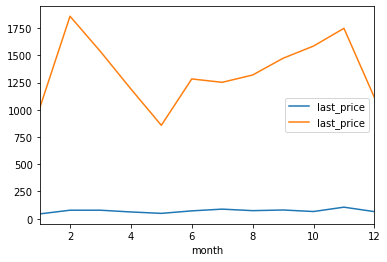

In [73]:
(top
     .groupby('month')['last_price'].count()
     .plot(x='month',y='last_price',style='-',legend=True)
)
(current_days_exposition_date
     .groupby('month')['last_price'].count()
     .plot(x='month',y='last_price',style='-',legend=True)
)

plt.show()

В течение месяцев квартиры в центре продаются примерно одинаково.

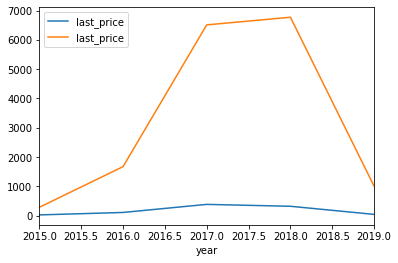

In [74]:
(top
     .groupby('year')['last_price'].count()
     .plot(x='year',y='last_price',style='-',legend=True)
)
(current_days_exposition_date
     .groupby('year')['last_price'].count()
     .plot(x='year',y='last_price',style='-',legend=True)
)

plt.show()

В течении пяти исследуемых лет в центре, также все примерно ровно продается

## Общий вывод

Если обобщить все данные, то можно сделать вывод, что больше всего квартир продается в будние дни,1-3 комнатные квартиры, на любом, кроме первого этажа, с высотой потолка 2,6 м за цену около 4,5 млн. руб. Увидели, что цена кв. зависет от этажа, района, от высоты потолка и от кол-ва комнат. Корреляция этих параметров в центре похоже и для всех квартир. Большее количество квартир продается в течении 100 дней после того как выставили объявление. 